# Google Drive Interface Setup

In [1]:
from google.colab import drive, auth
import sys

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pull down github repo, store in colab runtime memory
!git clone https://github.com/andrew-loeber/proj_utils_207.git

Cloning into 'proj_utils_207'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 8.72 KiB | 4.36 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
# Tell Python to also look in this repo when running an import
sys.path.insert(1, "/content/proj_utils_207")

In [5]:
# Authenticate google account and give back the session access token
auth.authenticate_user()
gcloud_token = !gcloud auth print-access-token
gcloud_token

['ya29.a0AbVbY6NFYJzvWaEVnuFtfQ-I5AxPr0slC0MO2ZABXK-kqAL0V09DI4DiSBxMQxGqYzoTgknzSViHa30r4IDi4azbTj2Ma-xbI_-V28j8_lfyLP-mPAl_UGJagFIYolgw_wsgX44S6zb32KRYKsYtKS3yOj6GaCgYKASYSARESFQFWKvPlWbm-CygGJbsCiU3P2D1JJw0163']

In [6]:
from gdriveinterface import GDriveInterface
import proj_ref

In [7]:
# Show email address, username, and the path of the shared project folder on
# your Google Drive instance
gdi = GDriveInterface(gcloud_token)
shared_folder_path = gdi.shared_folder_path
gdi.__dict__

{'email': 'aloeber@berkeley.edu',
 'account': 'aloeber',
 'shared_folder_path': '/content/drive/MyDrive/207-Project'}

In [8]:
# Show name keys and paths for tracked files
proj_ref.files

{'taxonomy': 'BirdCLEF/eBird_Taxonomy_v2021.csv',
 'orig_metadata': 'BirdCLEF/train_metadata_with_duration.csv',
 'sample_metadata': 'data/sample_metadata.csv',
 'species_metadata': 'data/species_metadata.csv',
 'train_metadata': 'data/train_metadata.csv',
 'test_metadata': 'data/test_metadata.csv'}

In [9]:
# Show name keys and paths for tracked directories
proj_ref.dirs

{'orig_audio': {'path': 'BirdCLEF/train_audio'},
 'train_audio': {'path': 'data/train/audio_files'},
 'test_audio': {'path': 'data/test/audio_files'},
 'train_npy_full': {'path': 'data/train/librosa_loaded'},
 'test_npy_full': {'path': 'data/test/librosa_loaded'},
 'train_npy_loud5s': {'path': 'data/train/librosa_loaded_loudest_5sec'},
 'test_npy_loud5s': {'path': 'data/test/librosa_loaded_loudest_5sec'}}

### **Usage examples**

##### Query specific file based on named key
```
command: gdi.get_file_path('taxonomy')
returns: '/content/drive/MyDrive/207-Project/BirdCLEF/eBird_Taxonomy_v2021.csv'
```

##### Query specific directory based on named key
```
command: gdi.get_dir_path('orig_audio')
returns: '/content/drive/MyDrive/207-Project/BirdCLEF/train_audio'
```

##### Query specific sample record based on named keys for directory and file
```
command: gdi.get_sample_path('train_audio', 'barswa/XC132406.ogg')
returns: '/content/drive/MyDrive/207-Project/data/train/audio_files/barswa/XC132406.ogg'
```

##### Provide full path given a custom partial path
```
command: gdi.join_to_shared('images/sandpiper.jpeg')
returns: '/content/drive/MyDrive/207-Project/images/sandpiper.jpeg'
```


# Imports and Setup

In [10]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.7 MB/s eta 0:00:00


In [11]:
!pip install colorednoise

In [12]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.32.0
    Uninstalling tensorflow-io-gcs-filesystem-0.32.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.32.0


In [13]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
# import tensorflow_addons as tfa
import librosa
from IPython.display import Audio
import audiomentations as am
import colorednoise as cn
import gc

In [14]:
import tensorflow_io as tfio

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Read in metadata, audio files, frames, & labels

In [16]:
train_frame_df = pd.read_csv(
    gdi.join_to_shared('3_species/8_sec/train/frame_df.csv')
)
train_frame_df

,data,primary_label,primary_label_enc,filename,filename_npy,rating,type,type_enc,country,country_enc,continent,continent_enc,file_duration_s,frame_length_s,hop_length_s,total_frames,frame_id
0,train,barswa,0,barswa/XC659151.ogg,barswa/XC659151.npy,good,call,2,PT,43,EUROPE,3,47.438375,8.0,4.0,10,1
1,train,barswa,0,barswa/XC659151.ogg,barswa/XC659151.npy,good,call,2,PT,43,EUROPE,3,47.438375,8.0,4.0,10,2
2,train,barswa,0,barswa/XC659151.ogg,barswa/XC659151.npy,good,call,2,PT,43,EUROPE,3,47.438375,8.0,4.0,10,3
3,train,barswa,0,barswa/XC659151.ogg,barswa/XC659151.npy,good,call,2,PT,43,EUROPE,3,47.438375,8.0,4.0,10,4
4,train,barswa,0,barswa/XC659151.ogg,barswa/XC659151.npy,good,call,2,PT,43,EUROPE,3,47.438375,8.0,4.0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,train,comsan,1,comsan/XC554068.ogg,comsan/XC554068.npy,poor,call,2,FI,17,EUROPE,3,25.600000,8.0,4.0,5,1
4551,train,comsan,1,comsan/XC554068.ogg,comsan/XC554068.npy,poor,call,2,FI,17,EUROPE,3,25.600000,8.0,4.0,5,2
4552,train,comsan,1,comsan/XC554068.ogg,comsan/XC554068.npy,poor,call,2,FI,17,EUROPE,3,25.600000,8.0,4.0,5,3
4553,train,comsan,1,comsan/XC554068.ogg,comsan/XC554068.npy,poor,call,2,FI,17,EUROPE,3,25.600000,8.0,4.0,5,4


In [17]:
train_labels = np.load(gdi.join_to_shared('3_species/8_sec/train/frame_labels.npy'))
train_labels[0:5]

array([0, 0, 0, 0, 0])

In [18]:
train_labels.shape

(4555,)

In [19]:
train_frames = np.load(gdi.join_to_shared('3_species/8_sec/train/frames.npy'))
train_frames[0:5]

array([[-2.4908164e-05, -1.4384452e-05, -1.4580583e-06, ...,
        -8.2094911e-03, -1.9421554e-03,  1.1914789e-03],
       [-1.0673620e-04, -2.1400156e-03, -1.1026845e-03, ...,
         4.8202332e-03,  2.9281883e-03,  3.1195693e-03],
       [-2.9880465e-03, -3.1490836e-03, -5.7823858e-03, ...,
         6.8153208e-03,  3.7235180e-03,  3.0109640e-03],
       [ 1.6595968e-03,  4.5402329e-03,  7.3014777e-03, ...,
        -8.7131960e-03,  4.3505826e-04,  4.0480806e-03],
       [ 2.4301414e-03, -6.0673305e-03,  3.3406611e-04, ...,
         3.5291351e-04,  8.8815088e-04,  2.9723914e-03]], dtype=float32)

In [20]:
train_frames.shape

(4555, 128000)

In [21]:
# train_files_filepath = gdi.join_to_shared('3_species/train/files.pkl')
# with open(train_files_filepath, 'rb') as file:
#   train_files = pkl.load(file)
# train_files[0:5]

In [22]:
# train_files = [file - np.mean(file) for file in train_files.copy()]
# train_files[0:5]

In [23]:
# train_sizes = np.array(train_file_df['file_duration_samples'])
# train_sizes[0:10]

In [24]:
# train_durations = np.array(train_file_df['file_duration_s'])
# train_durations[:10]

In [25]:
# train_sample_wts = np.array([ ((dur - 5.0) / 2.5) + 1 for dur in train_durations ])
# train_sample_wts /= np.mean(train_sample_wts)
# train_sample_wts

In [26]:
# train_sample_weights = np.array(train_file_df['file_duration_s'])
# train_sample_weights /= np.mean(train_sample_weights)
# train_sample_weights[0:10]

In [27]:
val_frame_df = pd.read_csv(
    gdi.join_to_shared('3_species/8_sec/val/frame_df.csv')
)
val_frame_df

,data,primary_label,primary_label_enc,filename,filename_npy,rating,type,type_enc,country,country_enc,continent,continent_enc,file_duration_s,frame_length_s,hop_length_s,total_frames,frame_id
0,val,comsan,1,comsan/XC157141.ogg,comsan/XC157141.npy,good,call,2,NO,40,EUROPE,3,46.920000,8.0,4.0,10,1
1,val,comsan,1,comsan/XC157141.ogg,comsan/XC157141.npy,good,call,2,NO,40,EUROPE,3,46.920000,8.0,4.0,10,2
2,val,comsan,1,comsan/XC157141.ogg,comsan/XC157141.npy,good,call,2,NO,40,EUROPE,3,46.920000,8.0,4.0,10,3
3,val,comsan,1,comsan/XC157141.ogg,comsan/XC157141.npy,good,call,2,NO,40,EUROPE,3,46.920000,8.0,4.0,10,4
4,val,comsan,1,comsan/XC157141.ogg,comsan/XC157141.npy,good,call,2,NO,40,EUROPE,3,46.920000,8.0,4.0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,val,eaywag1,2,eaywag1/XC286395.ogg,eaywag1/XC286395.npy,good,call,2,ES,16,EUROPE,3,10.579594,8.0,4.0,1,1
1781,val,barswa,0,barswa/XC270309.ogg,barswa/XC270309.npy,good,call,2,RU,44,EUROPE,3,17.554281,8.0,4.0,3,1
1782,val,barswa,0,barswa/XC270309.ogg,barswa/XC270309.npy,good,call,2,RU,44,EUROPE,3,17.554281,8.0,4.0,3,2
1783,val,barswa,0,barswa/XC270309.ogg,barswa/XC270309.npy,good,call,2,RU,44,EUROPE,3,17.554281,8.0,4.0,3,3


In [28]:
val_frame_labels = np.load(gdi.join_to_shared('3_species/8_sec/val/frame_labels.npy'))
val_frame_labels[0:5]

array([1, 1, 1, 1, 1])

In [29]:
val_frame_labels.shape

(1785,)

In [30]:
val_frames = np.load(gdi.join_to_shared('3_species/8_sec/val/frames.npy'))
val_frames[0:5]

array([[ 3.7471045e-06, -5.4060365e-06,  2.6134671e-06, ...,
         2.3040967e-03, -3.7745161e-03, -1.4450843e-04],
       [ 5.0942082e-02, -3.6996387e-02, -4.0604033e-02, ...,
         2.2871037e-04, -2.0736112e-04, -2.2806726e-04],
       [ 4.6008835e-03, -3.0539737e-03, -2.3850715e-03, ...,
        -1.2080190e-03,  3.0085228e-03, -7.2439294e-04],
       [ 3.9322444e-04, -6.4650073e-04, -3.1249391e-04, ...,
         1.0948505e-01, -1.8556438e-01,  1.5160102e-02],
       [-1.8263918e-03,  3.0452902e-03,  3.4987926e-05, ...,
         1.2079349e-03, -2.8473230e-03,  2.0937542e-03]], dtype=float32)

In [31]:
val_frames.shape

(1785, 128000)

# Define helper functions

In [32]:
# def get_random_clip(
#     audio
#     , rng
#     , clip_len=80000
#     ):
#   audio_len = len(audio)
#   clip_start = rng.integers(audio_len - clip_len)
#   clip_locs = (clip_start, clip_start + clip_len)
#   return audio[clip_locs[0] : clip_locs[1]].copy()


In [33]:
def audio_to_stft(
    audio
    , n_fft=128
    , hop_length=64):

  S = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
  S = np.abs(S)
  S_min, S_max = np.min(S), np.max(S)
  S_range = S_max - S_min
  return (S - S_min) / S_range

In [34]:
def audio_to_db_stft(
    audio
    , n_fft=128
    , hop_length=64):

  S = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
  S = np.abs(S)
  S = librosa.amplitude_to_db(S, ref=np.max)
  S -= np.mean(S)
  S /= np.std(S)
  return S

In [35]:
def transform_frames(frames, transform, transform_args):
  return np.array([transform(frame.copy(), **transform_args) for frame in frames])

def transform_frame(frame, transform, transform_args):
  return transform(frame.copy(), **transform_args)

In [36]:
def audio_compress(samples, sample_rate, mu_min=1, mu_max=17):
  mu = np.random.uniform(low=mu_min, high=mu_max)
  return librosa.mu_compress(samples, mu=mu, quantize=False)

def audio_expand(samples, sample_rate, mu_min=1, mu_max=17):
  mu = np.random.uniform(low=mu_min, high=mu_max)
  return librosa.mu_expand(samples, mu=mu, quantize=False)

def add_silent_frames(samples, sample_rate, p_min=5e-5, p_max=1e-2):
  p_min_log, p_max_log = np.log(p_min), np.log(p_max)
  prob_log = np.random.uniform(low=p_min_log, high=p_max_log)
  prob = np.exp(prob_log)
  mask = np.random.binomial(n=1, p=1-prob, size=len(samples))
  return (mask * samples).astype(np.float32)

def add_crackle(samples, sample_rate, p_min=1e-5, p_max=2e-4):
  p_min_log, p_max_log = np.log(p_min), np.log(p_max)
  prob_log = np.random.uniform(low=p_min_log, high=p_max_log)
  prob = np.exp(prob_log)
  mask = np.random.binomial(n=1, p=prob, size=len(samples))
  noise = np.random.binomial(n=1, p=0.5, size=len(samples)) * 2 - 1
  return np.where(mask, noise, samples).astype(np.float32)

def add_colored_noise(
    samples
    , sample_rate
    , exp_min=-4
    , exp_max=2
    , scale_min=0.005
    , scale_max=0.025
    ):
  exp = np.random.uniform(low=exp_min, high=exp_max)
  scale = np.random.uniform(low=scale_min, high=scale_max)
  noise = cn.powerlaw_psd_gaussian(exp, size=len(samples))
  return samples + (scale * noise)

def add_colored_noise2(
    samples
    , sample_rate
    , min_gain_db=-18.0
    , max_gain_db=18.0
    , scale_min=0.005
    , scale_max=0.05
    ):
  eq = am.SevenBandParametricEQ(
      min_gain_db=min_gain_db
      , max_gain_db=max_gain_db
      , p=1.0
  )
  norm = am.Normalize(p=1.0)
  scale = np.random.uniform(low=scale_min, high=scale_max)
  noise = np.random.randn(len(samples))
  noise = eq(noise, sample_rate=sample_rate)
  noise = norm(noise, sample_rate=sample_rate)
  return samples + (scale * noise)

# Processing

In [37]:
%who

Audio	 GDriveInterface	 add_colored_noise	 add_colored_noise2	 add_crackle	 add_silent_frames	 am	 audio_compress	 audio_expand	 
audio_to_db_stft	 audio_to_stft	 auth	 cn	 drive	 gc	 gcloud_token	 gdi	 layers	 
librosa	 np	 pd	 pkl	 plt	 proj_ref	 shared_folder_path	 sns	 sys	 
tf	 tfio	 train_frame_df	 train_frames	 train_labels	 transform_frame	 transform_frames	 val_frame_df	 val_frame_labels	 
val_frames	 


In [38]:
gc.collect()

53

In [39]:
transform = audio_to_db_stft
transform_args = {'n_fft': 64, 'hop_length': 64}

In [40]:
val_features = transform_frames(val_frames, transform, transform_args)
val_features.shape

(1785, 33, 2001)

In [ ]:
# del val_frames

In [41]:
gc.collect()

43394

In [ ]:
# plt.figure(figsize=(18,4))
# librosa.display.specshow(
#     val_features[1052,:,:]
#     , x_axis='time'
#     , y_axis='linear'
#     , sr=16000
#     , hop_length=64
# )

In [42]:
aug = am.Compose([
    # am.PitchShift(-2, 2, 0.25)
    # , am.Shift(-0.15, 0.15, False, p=1.0)
    am.Normalize(p=1.0)
    , am.OneOf([
        am.Lambda(transform=audio_compress, mu_min=1, mu_max=7, p=0.3)
        , am.Lambda(transform=audio_expand, mu_min=1, mu_max=11, p=0.3)
    ])

    , am.PeakingFilter(100, 2000, -15, 15, 1.0, 5.0, p=0.35)
    , am.PeakingFilter(2000, 4000, -15, 15, 1.0, 5.0, p=0.35)
    , am.PeakingFilter(4000, 6000, -15, 15, 1.0, 5.0, p=0.35)
    , am.PeakingFilter(6000, 7500, -15, 15, 1.0, 5.0, p=0.35)
    , am.LowPassFilter(4000, 7000, 6, 24, p=0.35)
    , am.HighPassFilter(100, 2000, 6, 24, p=0.35)

    # , am.TimeMask(0.01, 0.1, p=0.5)
    # , am.TimeMask(0.01, 0.1, p=0.5)
    # , am.TimeMask(0.01, 0.1, p=0.5)
    # , am.TimeMask(0.01, 0.1, p=0.5)
    # , am.TimeMask(0.01, 0.1, p=0.5)

    , am.Lambda(
        transform=add_colored_noise2
        , min_gain_db=-15.0
        , max_gain_db=15.0
        , scale_min=0.005
        , scale_max=0.1
        , p=0.65
    )

    # , am.PeakingFilter(1000, 7000, -50, -38, 1, 2, 0.5)

    , am.Normalize(p=1.0)
    , am.Lambda(transform=add_silent_frames, p=0.2)
    , am.Lambda(transform=add_crackle, p=0.2)
])

In [43]:
def spec_augment(S
                 , n_t_masks = 3
                 , max_t_mask_width = 250
                 , n_f_masks = 2
                 , max_f_mask_width = 5
                 ):
  for i in range(n_t_masks):
    S = tfio.audio.freq_mask(S, param=max_t_mask_width)
  for i in range(n_f_masks):
    S = tfio.audio.time_mask(S, param=max_f_mask_width)

  return S.numpy()

In [44]:
sample_audio_num = 1055
val_frame_df.iloc[sample_audio_num]

data                                 val
primary_label                    eaywag1
primary_label_enc                      2
filename             eaywag1/XC25775.ogg
filename_npy         eaywag1/XC25775.npy
rating                              good
type                                call
type_enc                               2
country                               SE
country_enc                           46
continent                         EUROPE
continent_enc                          3
file_duration_s                14.262844
frame_length_s                       8.0
hop_length_s                         4.0
total_frames                           2
frame_id                               2
Name: 1055, dtype: object

In [45]:
sample_audio = val_frames[sample_audio_num]
sample_audio

array([0.05122634, 0.04957389, 0.04713593, ..., 0.03040462, 0.02234454,
       0.02332248], dtype=float32)

In [46]:
Audio(sample_audio, rate=16000, autoplay=True)

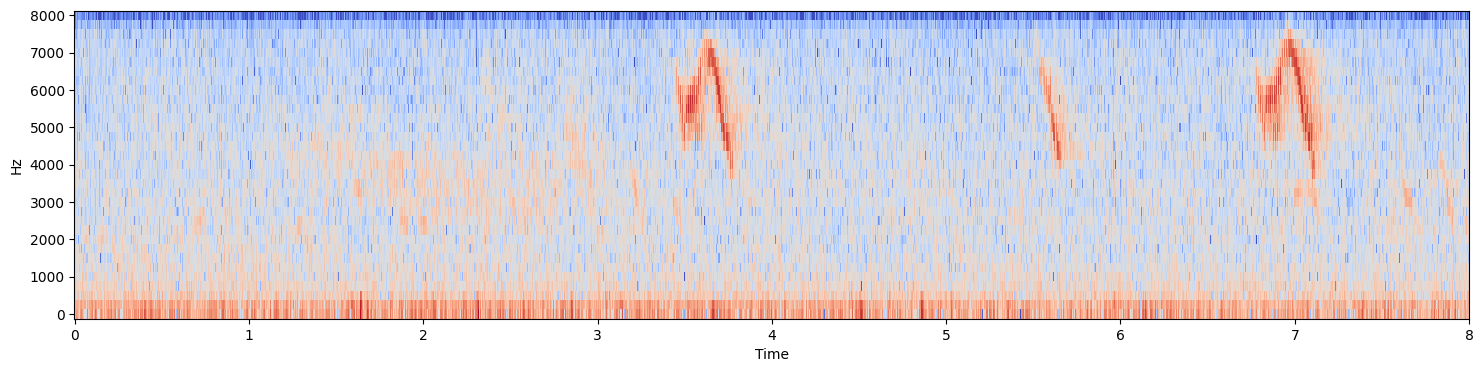

In [47]:
sample_spec = transform_frame(sample_audio, transform, transform_args)
# sample_spec = audio_to_db_stft(sample_audio, n_fft=128, hop_length=64)
plt.figure(figsize=(18,4))
librosa.display.specshow(
    sample_spec
    , x_axis='time'
    , y_axis='linear'
    , sr=16000
    , hop_length=64
)

In [48]:
#sample_audio_aug = am.LowPassFilter(200, 4000, 12, 24, p=1.0)(sample_audio, 16000)
sample_audio_aug = aug(sample_audio, 16000)
Audio(sample_audio_aug, rate=16000, autoplay=True)

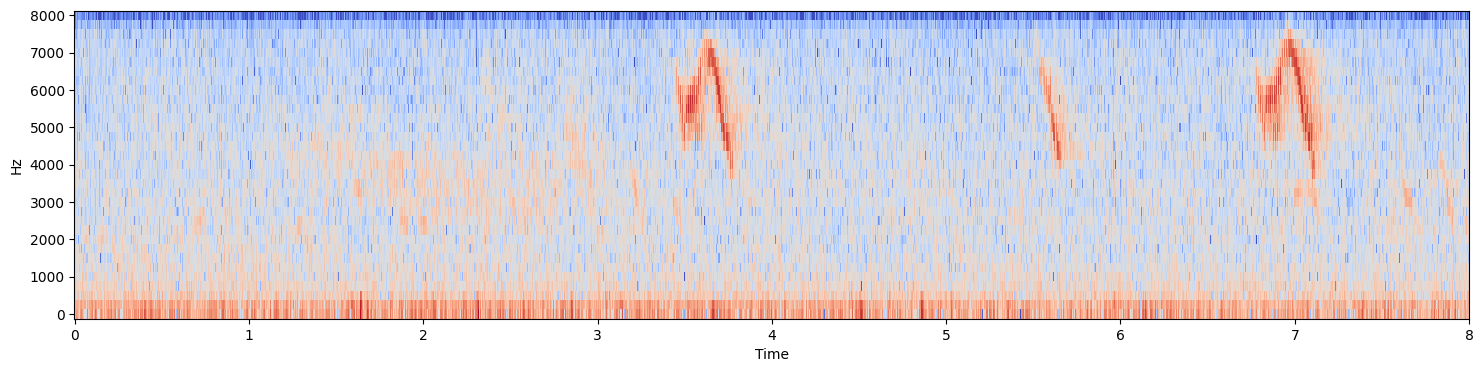

In [49]:
sample_spec_aug = transform_frame(sample_audio_aug, transform, transform_args)
plt.figure(figsize=(18,4))
librosa.display.specshow(
    sample_spec_aug
    , x_axis='time'
    , y_axis='linear'
    , sr=16000
    , hop_length=64
)

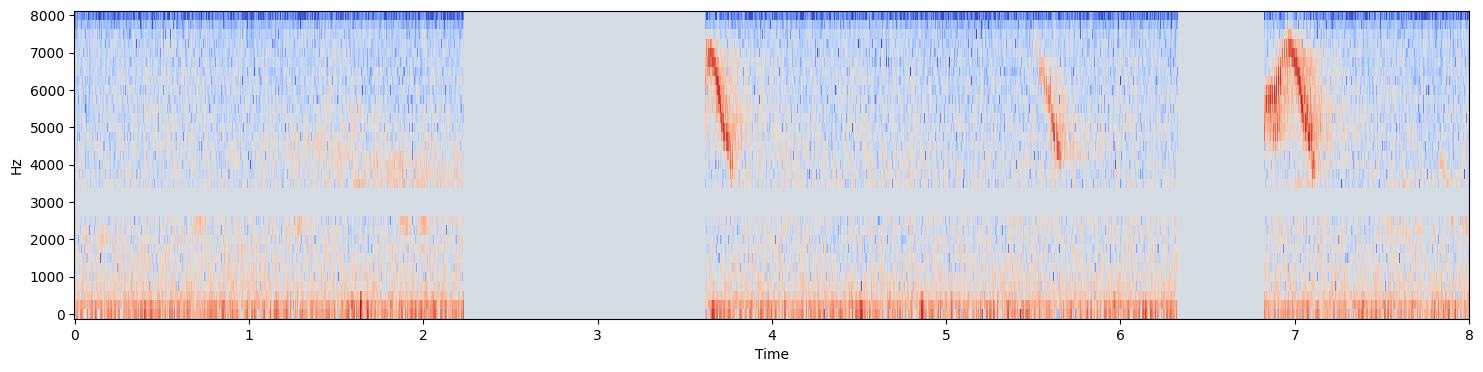

In [52]:
plt.figure(figsize=(18,4))
librosa.display.specshow(
    spec_augment(sample_spec_aug)
    , x_axis='time'
    , y_axis='linear'
    , sr=16000
    , hop_length=64
)

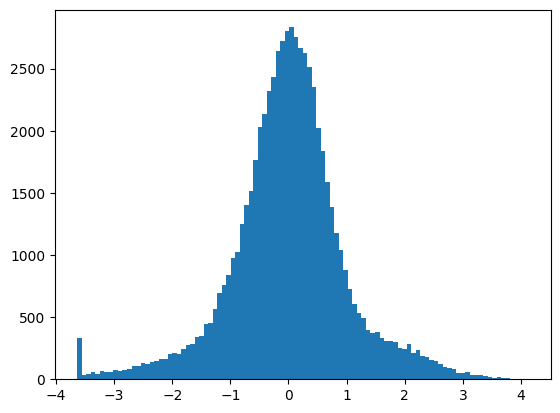

In [53]:
plt.hist(sample_spec_aug.flat, bins=100)
plt.show()

# Define audio sequence

In [54]:
class AudioSequence(tf.keras.utils.Sequence):
  def __init__(self
               , x
               , y
               , batch_size
               , feature_transform
               , feature_transform_args
               , durations=None
               , augmentation=None
               , shuffle=True
               , seed=42):
    self.x, self.y, self.durations = x, y, durations
    self.data_length = len(y)
    self.sample_wts = self._get_sample_weights()
    self.batch_size = batch_size

    self.augmentation = augmentation
    self.feature_transform = feature_transform
    self.feature_transform_args = feature_transform_args.copy()

    self.shuffle = shuffle
    self.indices = np.arange(self.data_length)
    self.rng = np.random.default_rng(seed=seed)
    if self.shuffle:
      self.rng.shuffle(self.indices)

  def __len__(self):
    return self.data_length // self.batch_size

  def _get_sample_weights(self):
    if self.durations is None:
      return np.ones(self.data_length)
    else:
      wts = np.array([ 1.0 - (5.0 / dur) for dur in self.durations ])
      #wts = np.array([ ((dur - 5.0) / 2.5) + 1 for dur in self.durations ])
      wts /= np.mean(wts)
      return wts

  def __getitem__(self, idx):
    batch_indexes = self.indices[
        idx * self.batch_size : (idx + 1) * self.batch_size
    ]

    #x_batch = [self.x[i] for i in batch_indexes]

    x_batch = self.x[batch_indexes]

    x_batch = transform_frames(
        x_batch, self.augmentation, {'sample_rate': 16000}
    )

    x_batch = transform_frames(
        x_batch
        , self.feature_transform
        , self.feature_transform_args
    )

    x_batch = transform_frames(
          x_batch, spec_augment, {}
    )

    y_labels = self.y[batch_indexes]
    wts = self.sample_wts[batch_indexes]

    return x_batch, y_labels, wts

  def on_epoch_end(self):
    if self.shuffle:
      self.rng.shuffle(self.indices)
    # print(self.indices)
    gc.collect()

In [91]:
BATCH_SIZE = 64

train_seq = AudioSequence(
    x=train_frames
    , y=train_labels
    , batch_size=BATCH_SIZE
    , feature_transform=transform
    , feature_transform_args=transform_args
    , durations=None
    , augmentation=aug
    , shuffle=True
    , seed=42
)

In [56]:
train_seq_it = train_seq.__iter__()

In [90]:
next(train_seq_it)

(array([[[-1.9870400e+00, -6.2233305e-01, -1.0772884e+00, ...,
          -1.0757368e+00, -1.6561097e+00,  1.2095338e+00],
         [-8.3640319e-01, -8.3914185e-01, -1.0899303e+00, ...,
          -7.9958993e-01, -8.5092205e-01,  1.2131338e+00],
         [-6.6188186e-01, -7.2841388e-01, -7.7443826e-01, ...,
          -1.3197312e+00, -1.0295466e+00,  1.2048875e+00],
         ...,
         [-7.0108294e-01, -3.2182235e-01, -6.8147868e-01, ...,
          -7.1598548e-01, -7.2755957e-01, -3.4758866e-02],
         [-8.5817802e-01, -9.2715687e-01, -1.2007495e+00, ...,
          -1.2041196e+00, -1.2447319e+00, -3.4808537e-01],
         [-1.0665996e+00, -1.0749620e+00, -1.2569970e+00, ...,
          -1.9097677e+00, -1.9970018e+00, -4.2027840e-01]],
 
        [[ 2.4987528e+00,  2.7034352e+00,  1.7428602e+00, ...,
           2.3574369e+00,  2.6220865e+00,  2.4417515e+00],
         [ 2.3785632e+00,  2.3573709e+00,  2.2915144e+00, ...,
           1.6076597e+00,  2.2012348e+00,  2.2892299e+00],
       

# Define Additional Layers

In [92]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        cls_randroll = np.random.randn(projection_dim) / 10
        self.cls_token = tf.Variable(
            initial_value=cls_randroll.reshape((1, 1, -1))
            , trainable=True
            , dtype=tf.float32
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        batch_len = tf.shape(patch)[0]
        cls_token_rpt = tf.repeat(self.cls_token, batch_len, axis=0)
        return tf.concat([cls_token_rpt, encoded], axis=-2)

In [93]:
class FFN(layers.Layer):
    def __init__(self, dim, middle_dim, dropout_rate):
        super().__init__()
        self.dim = dim
        self.middle_dim = middle_dim
        self.dropout_rate = dropout_rate
        self.expand = layers.Dense(middle_dim, activation=tf.nn.gelu)
        self.compress = layers.Dense(dim, activation=tf.nn.gelu)
        self.dropout = layers.Dropout(dropout_rate)

    def call(self, patch):
        x = self.expand(patch)
        x = self.dropout(x)
        x = self.compress(x)
        x = self.dropout(x)
        return x

# Define Model

In [94]:
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=(33, 2001))

# add multiplicative gaussian noise to spectrogram
add_noise = layers.GaussianDropout(rate=0.025)(inputs)

# transpose from (B, F, T) -> (B, T, F)
permute1 = layers.Permute((2,1))(add_noise)

#add dummy channel to use extract_patches
add_channel = layers.Reshape(target_shape=(2001, 33, 1))(permute1)

# extract patches
patches0 = tf.image.extract_patches(
    images=add_channel
    , sizes=[1,10,33,1]
    , strides=[1,10,33,1]
    , rates=[1,1,1,1]
    , padding='VALID'
)

# remove dummy channel & apply patch linear projection, positional encodings,
# and append classification token
patches = layers.Reshape(target_shape=(200, 330))(patches0)
pe = PatchEncoder(200, 64)
patches_enc = pe(patches)

# Transformer block #1
patches_enc_ln = layers.LayerNormalization()(patches_enc)
patches_enc_mha = layers.MultiHeadAttention(
    num_heads=4
    , key_dim=16
    ,dropout=0.15
)(patches_enc_ln, patches_enc_ln)
patches_enc_skip1 = layers.Add()([patches_enc, patches_enc_mha])
patches_enc_ln2 = layers.LayerNormalization()(patches_enc_skip1)
patches_enc_ffn = FFN(64, 96, 0.25)(patches_enc_ln2)
patches_enc_skip2 = layers.Add()([patches_enc_skip1, patches_enc_ffn])

# Transformer block #2
patches_enc_ln_2 = layers.LayerNormalization()(patches_enc_skip2)
patches_enc_mha_2 = layers.MultiHeadAttention(
    num_heads=4
    , key_dim=16
    ,dropout=0.15
)(patches_enc_ln_2, patches_enc_ln_2)
patches_enc_skip1_2 = layers.Add()([patches_enc_skip2, patches_enc_mha_2])
patches_enc_ln2_2 = layers.LayerNormalization()(patches_enc_skip1_2)
patches_enc_ffn_2 = FFN(64, 96, 0.25)(patches_enc_ln2_2)
patches_enc_skip2_2 = layers.Add()([patches_enc_skip1_2, patches_enc_ffn_2])

# Final self-attention application
patches_enc_ln3 = layers.LayerNormalization()(patches_enc_skip2_2)
patches_enc_mha_3 = layers.MultiHeadAttention(
    num_heads=16
    , key_dim=4
    ,dropout=0.15
)(patches_enc_ln3, patches_enc_ln3)
patches_enc_skip1_3 = layers.Add()([patches_enc_skip2_2, patches_enc_mha_3])

# Throw away everything but classification token & predict classes
cls_token_out = layers.Cropping1D(cropping=(0, 200))(patches_enc_skip1_3)
cls_token_out_ln = layers.LayerNormalization()(cls_token_out)
flatten = layers.Flatten()(cls_token_out_ln)
flatten_dropout = layers.Dropout(rate=0.3)(flatten)
preds = layers.Dense(3)(flatten_dropout)


add_noise_m = tf.keras.Model(inputs, add_noise)
patches_m = tf.keras.Model(inputs, patches)

model = tf.keras.Model(inputs, preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 33, 2001)]   0           []                               
                                                                                                  
 gaussian_dropout (GaussianDrop  (None, 33, 2001)    0           ['input_1[0][0]']                
 out)                                                                                             
                                                                                                  
 permute (Permute)              (None, 2001, 33)     0           ['gaussian_dropout[0][0]']       
                                                                                                  
 reshape (Reshape)              (None, 2001, 33, 1)  0           ['permute[0][0]']          

In [1]:
pe.cls_token

NameError: ignored

In [96]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss'
    , patience=5
    , verbose=1
    , restore_best_weights=True
)

In [97]:
model.compile(
    #optimizer=tf.keras.optimizers.SGD(learning_rate=5e-3, momentum=0.9)
     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4)
    , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    , metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name='acc')
    ]
)

In [98]:
model.fit(
    x=train_seq
    , epochs=50
    , validation_data=(val_features, val_frame_labels)
    , validation_batch_size=128
    , workers=4
    , use_multiprocessing=True
    , callbacks=[earlystop]
)

Epoch 1/50
71/71 [==============================] - 427s 6s/step - loss: 1.1988 - acc: 0.4624 - val_loss: 0.8584 - val_acc: 0.5468
Epoch 2/50
71/71 [==============================] - 411s 6s/step - loss: 0.7859 - acc: 0.6699 - val_loss: 0.4735 - val_acc: 0.8308
Epoch 3/50
71/71 [==============================] - 416s 6s/step - loss: 0.6512 - acc: 0.7397 - val_loss: 0.3990 - val_acc: 0.8588
Epoch 4/50
71/71 [==============================] - 407s 6s/step - loss: 0.5448 - acc: 0.7874 - val_loss: 0.3114 - val_acc: 0.8919
Epoch 5/50
71/71 [==============================] - 413s 6s/step - loss: 0.4893 - acc: 0.8112 - val_loss: 0.2630 - val_acc: 0.9132
Epoch 6/50
71/71 [==============================] - 410s 6s/step - loss: 0.4741 - acc: 0.8138 - val_loss: 0.2616 - val_acc: 0.9126
Epoch 7/50
71/71 [==============================] - 406s 6s/step - loss: 0.4354 - acc: 0.8341 - val_loss: 0.2860 - val_acc: 0.9053
Epoch 8/50
71/71 [==============================] - 406s 5s/step - loss: 0.4067 - a

In [100]:
history = model.history.history.copy()
history

{'loss': [1.1988214254379272,
  0.785872757434845,
  0.6512483358383179,
  0.544832706451416,
  0.4892556071281433,
  0.4740848243236542,
  0.4353698790073395,
  0.4067443311214447,
  0.406800776720047,
  0.3850274085998535,
  0.3619435429573059,
  0.35022059082984924,
  0.33482232689857483,
  0.3308974802494049,
  0.3138776421546936,
  0.30406203866004944,
  0.31785449385643005,
  0.313983678817749,
  0.295571893453598,
  0.2821008265018463,
  0.29365479946136475,
  0.2632056474685669,
  0.27609753608703613,
  0.27792343497276306,
  0.2743780314922333,
  0.26311758160591125],
 'acc': [0.4623679518699646,
  0.6698943376541138,
  0.7396566867828369,
  0.7874119877815247,
  0.8111795783042908,
  0.8138204216957092,
  0.8340669274330139,
  0.8424295783042908,
  0.8400087952613831,
  0.8518925905227661,
  0.8595950603485107,
  0.8655369877815247,
  0.8686179518699646,
  0.8694982528686523,
  0.8783010840415955,
  0.8789612650871277,
  0.8791813254356384,
  0.8800616264343262,
  0.888644337

In [121]:
#model.save(gdi.join_to_shared('notebooks/AL/models/ViT_8s_stft.keras'))

In [ ]:
model2 = tf.keras.models.load_model(gdi.join_to_shared('notebooks/AL/models/ViT_1.keras')
  , custom_objects={"PatchEncoder": PatchEncoder, "FFN": FFN}
)

In [ ]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 33, 1251)]   0           []                               
                                                                                                  
 gaussian_dropout (GaussianDrop  (None, 33, 1251)    0           ['input_1[0][0]']                
 out)                                                                                             
                                                                                                  
 permute (Permute)              (None, 1251, 33)     0           ['gaussian_dropout[0][0]']       
                                                                                                  
 reshape (Reshape)              (None, 1251, 33, 1)  0           ['permute[0][0]']          

In [ ]:
patch_enc_m2 = tf.keras.Model(
    inputs=model2.input
    , outputs=model2.get_layer('layer_normalization_4').output
)

In [ ]:
model2.get_layer('patch_encoder_1').get_weights()[3]

array([[ 0.04808214, -0.02497224,  0.02779267, ..., -0.08437417,
         0.0118306 , -0.02504291],
       [-0.01145187, -0.02962087,  0.04457357, ...,  0.07873098,
         0.11699288,  0.01071569],
       [-0.00724811,  0.01515337,  0.01124441, ..., -0.01321097,
         0.00043546,  0.06517572],
       ...,
       [ 0.08712531,  0.02741945, -0.02845596, ...,  0.03064393,
         0.09317464, -0.00104974],
       [-0.00391965,  0.0706066 , -0.03613025, ...,  0.00423967,
         0.01406963, -0.04596414],
       [-0.04259229,  0.01450546,  0.00913536, ..., -0.08333138,
         0.11010785,  0.08607494]], dtype=float32)

# Plot History

In [ ]:
history = {}

for key in history1.keys():
  history[key] = history1[key]

history

{'loss': [1.0894591808319092,
  0.6075209379196167,
  0.5104630589485168,
  0.4493240714073181,
  0.39634838700294495,
  0.37766942381858826,
  0.3477723300457001,
  0.330608069896698,
  0.3300228714942932,
  0.303179532289505,
  0.3020549714565277,
  0.28557950258255005,
  0.2733916938304901,
  0.2730240225791931,
  0.25600048899650574,
  0.26905471086502075,
  0.2542254626750946,
  0.23354186117649078,
  0.24567286670207977,
  0.23209542036056519,
  0.24528469145298004,
  0.23078808188438416,
  0.22270479798316956,
  0.22595462203025818,
  0.23632343113422394,
  0.20948819816112518,
  0.212769016623497,
  0.21466855704784393,
  0.21191230416297913,
  0.20841482281684875],
 'acc': [0.5380721688270569,
  0.7605633735656738,
  0.8023767471313477,
  0.8237236142158508,
  0.8514524698257446,
  0.8626760840415955,
  0.8670774698257446,
  0.8776408433914185,
  0.875660240650177,
  0.8895246386528015,
  0.8860034942626953,
  0.891285240650177,
  0.8956866264343262,
  0.8998679518699646,
  0.

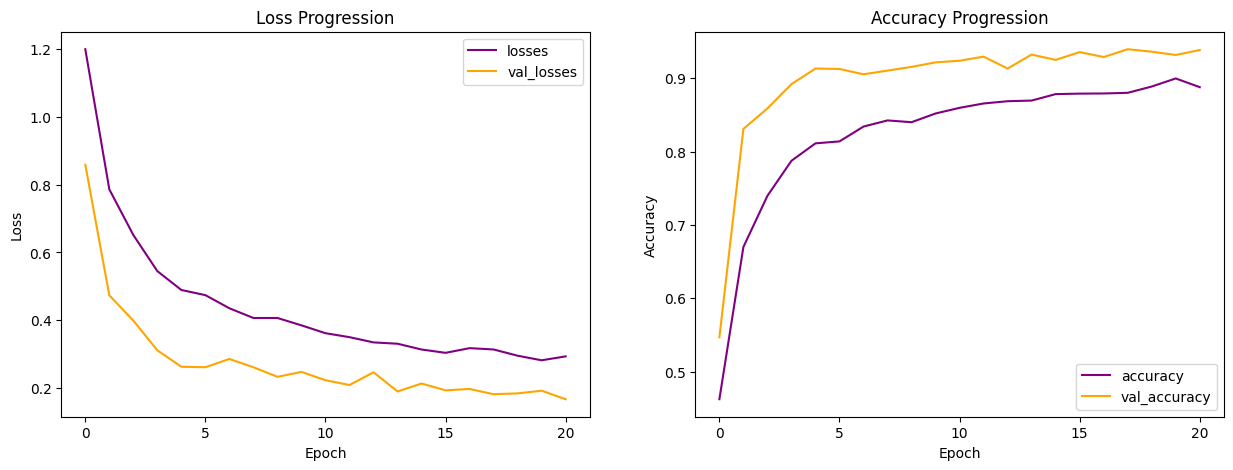

In [105]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

axes[0].plot(history['loss'][:21], color='purple', label='losses')
axes[0].plot(history['val_loss'][:21], color='orange', label='val_losses')
axes[0].set_xlabel('Epoch')
axes[0].set_xticks(np.arange(0, 21, 5))
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Progression')
axes[0].legend()

axes[1].plot(history['acc'][:21], color='purple', label='accuracy')
axes[1].plot(history['val_acc'][:21], color='orange', label='val_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_xticks(np.arange(0, 21, 5))
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Progression')
axes[1].legend()
plt.show()

In [107]:
history_filepath = gdi.join_to_shared('notebooks/AL/models/ViT_8s_stft.pkl')
with open(history_filepath, 'wb') as file:
  pkl.dump(history, file)

# Evaluate on training frames

In [117]:
del val_features
del val_frames

In [118]:
gc.collect()

238

In [119]:
train_features = transform_frames(train_frames, transform, transform_args)
train_features.shape

(4555, 33, 2001)

In [120]:
model.evaluate(
    x=train_features
    , y=train_labels
    , batch_size=128
)

36/36 [==============================] - 80s 2s/step - loss: 0.1193 - acc: 0.9618


[0.11929105967283249, 0.961800217628479]

# See results

In [108]:
sample_audio_num = 1095
sample_audio = val_frames[sample_audio_num]
sample_audio_aug = aug(sample_audio, 16000)
sample_spec = transform_frame(sample_audio, transform, transform_args)
sample_spec_aug = transform_frame(sample_audio_aug, transform, transform_args)

sample_audio_info = val_frame_df.iloc[sample_audio_num]
sample_audio_info

/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


data                                 val
primary_label                     comsan
primary_label_enc                      1
filename             comsan/XC577633.ogg
filename_npy         comsan/XC577633.npy
rating                              good
type                                call
type_enc                               2
country                               NO
country_enc                           40
continent                         EUROPE
continent_enc                          3
file_duration_s                  145.992
frame_length_s                       8.0
hop_length_s                         4.0
total_frames                          35
frame_id                              33
Name: 1095, dtype: object

In [109]:
Audio(sample_audio, rate=16000, autoplay=True)

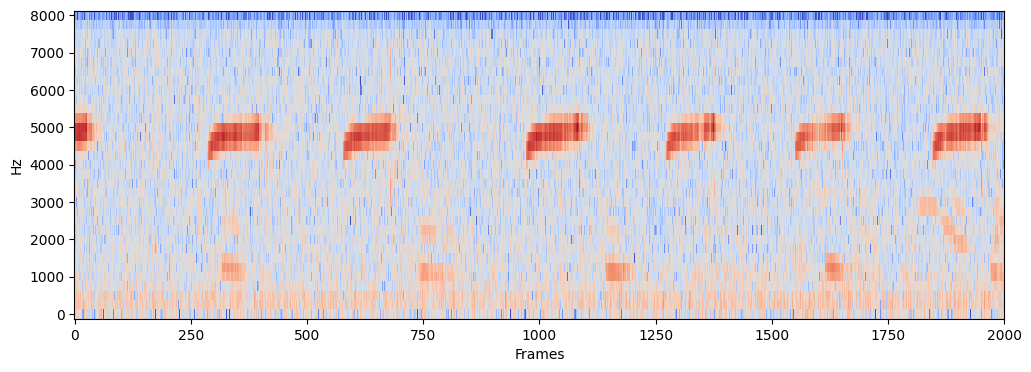

In [110]:
plt.figure(figsize=(12,4))
librosa.display.specshow(
    sample_spec
    , x_axis='frames'
    , y_axis='linear'
    , sr=16000
    , hop_length=64
)

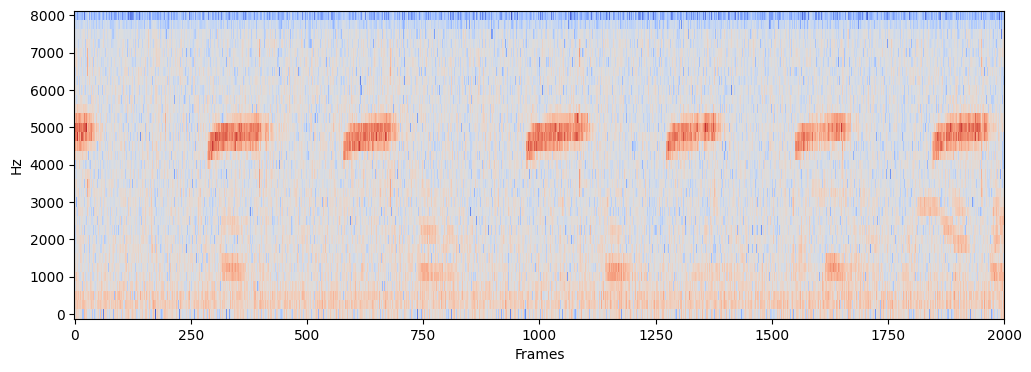

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.specshow(
    np.array(tf.squeeze(add_noise_m((np.array([sample_spec])), training=True)))
    , x_axis='frames'
    , y_axis='linear'
    , sr=16000
    , hop_length=64
)

In [111]:
sample_audio_info['primary_label_enc']

1

In [122]:
layers.Softmax()(model(np.array([sample_spec])))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[3.4579716e-05, 9.9984384e-01, 1.2152018e-04]], dtype=float32)>

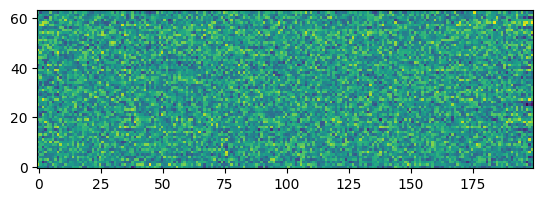

In [113]:
pos_encodings = model.get_layer('patch_encoder').get_weights()[3]
plt.imshow(pos_encodings.T, aspect='equal', origin='lower', interpolation='none')

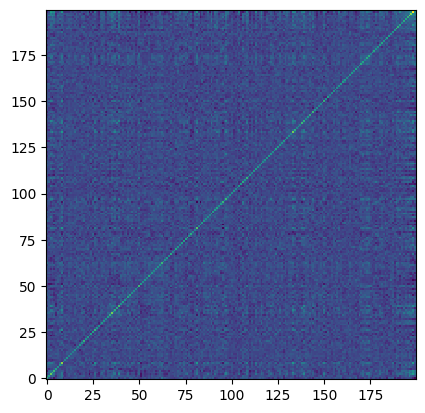

In [114]:
plt.imshow((pos_encodings @ pos_encodings.T), aspect='equal', origin='lower', interpolation='none')

In [ ]:
# lstm_out = tf.squeeze(patch_enc_m2((np.array([sample_spec]))))
lstm_out = patch_enc_m2((np.array([sample_spec])))

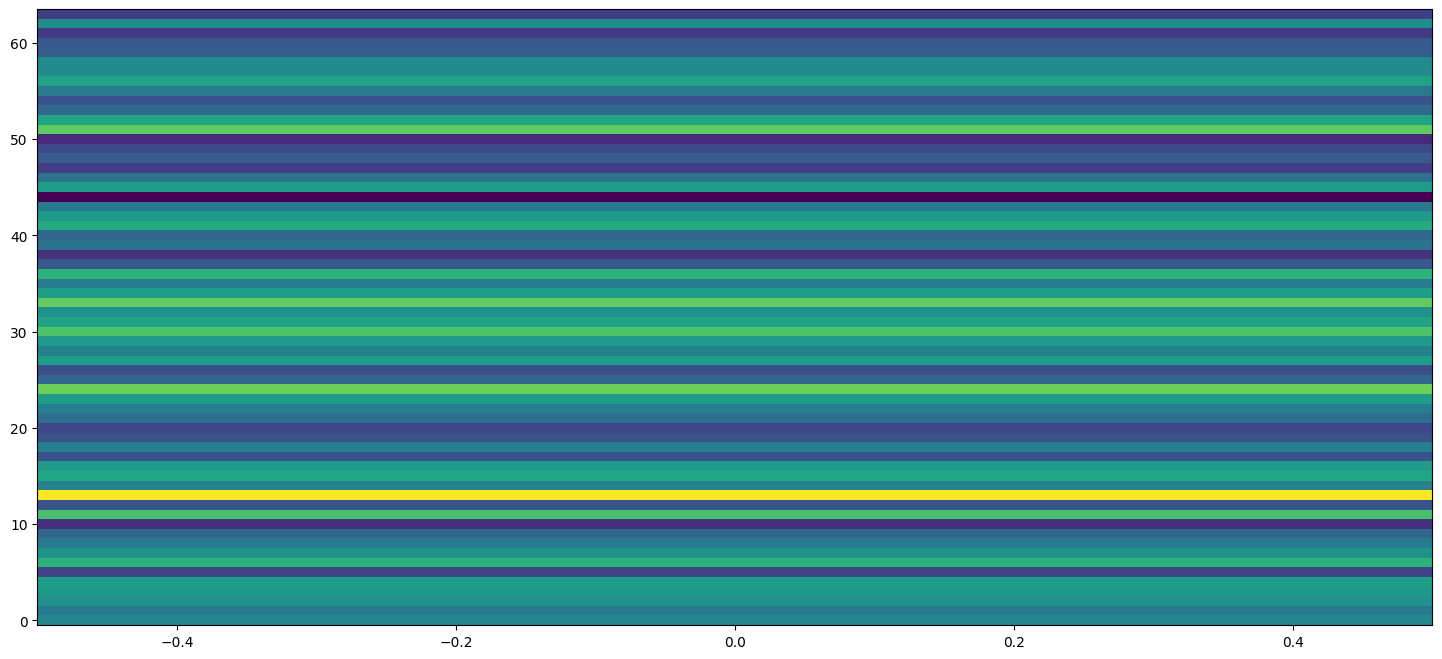

In [ ]:
plt.figure(figsize=(18,8))
plt.imshow(np.array(lstm_out).T, aspect='auto', origin='lower', interpolation='none')